<a href="https://colab.research.google.com/github/Josephnyingi/Real_Estate_Prediction_Model/blob/main/Real_Estate_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis - Exercise 1

## 1. Defining the Question

### a) Specifying the Question


The goal for this analysis is to study the factors that affect housing prices using the given information (dataset) on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 



### b) Defining the Metric for Success

This analysis will be considered a success when we are able to effectively use various regressions to the dataset in and identify the best prediction model that has the highest accuracy level. The baseline model should be identified and compared to other regression models. The selected prediction model for this research question should not suffer from any instances of overfitting or underfitting.

### c) Understanding the context 

Real estate is the land along with any permanent improvements attached to the land, whether natural or man-made—including water, trees, minerals, buildings, homes, fences, and bridges. Real estate is a form of real property.
The term real estate means real, or physical, property. “Real” comes from the Latin root res, or things. Others say it’s from the Latin word rex, meaning “royal,” since kings used to own all land in their kingdoms. 

Real estate also refers to producing, buying and selling real estate. 
As an investor in the real estate business, a company such as Hass Consulting, needs to be able to sell real estate properties at a price that is both profitable to them and attractive enough to the clients. While a low price might attract more customers, the company may experience low profit margin which can hinder growth. On the other hand, a high price may not bring in any customers therefore reducing the revenue stream.

Proper valuation of real estate is not only important for private businesses but also financial institutions such as banks. This is because banks often offer loans and mortgages to home owners, business or investors. When financial institutions do not price real estate appropriately, the negative effects in the economy could be dire. This was well demonstarated in the housing bubble burst during the 2008 financial crisis.

Various factors affect the price of any real estate property. Some of these factors include the square footage, number of rooms, location, year of construction and the nature of views and amenities available in the locale. This analysis seeks to study some of the mentioned variables and train a regression model that can the be used to predict the price of a house. 

The models tested in this analysis include multiple linear regression, quantile regression, ridge regression, lasso regression and elastic net regression.



### d) Recording the Experimental Design


Below are the steps that will be conducted in this analysis to answer the research question:

1. Load data and preview preliminary characteristics

2. Data Cleaning (check for and deal with outliers, anomalies and missing data)

3. Exploratory Analysis

4. Implementing the Solution

5. Challenging the Solution

6. Follow Up Questions

### e) Data Relevance

The data available for this project was provided by Hass Consulting Company, a real estate leader with over 25 years of experience. The dataset has information on real estate properties that was collected over the past few months.

Some of the attributes availbale in the dataset include price, number of bedrooms and bathrooms, condition, year built, zipcode among others.

# Importing relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

## 2. Reading the Data

In [ ]:
# Loading the Dataset
# Dataset url = http://bit.ly/IndependentProjectWeek7Dataset 
#
Real_estate = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')

Real_estate

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0      7129300520  221900.0         3  ... -122.257           1340        5650
1      6414100192  538000.0         3  ... -122.319           1690        7639
2      5631500400  180000.0         2  ... -122.233           2720        8062
3      2487200875  604000.0         4  ... -122.393           1360        5000
4      1954400510  510000.0         3  ... -122.045           1800        7503
...           ...       ...       ...  ...      ...            ...         ...
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[21613 rows x 20 columns]

## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
Real_estate.shape

(21613, 20)

In [ ]:
#Checking Column Names

Real_estate.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# Previewing the top of our dataset
#
Real_estate.head(5)

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [ ]:
# Previewing the bottom of our dataset
# 
Real_estate.tail(5)

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[5 rows x 20 columns]

In [ ]:
# Checking whether each column has an appropriate datatype
#
Real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
# previewing a sample of the data
#
Real_estate.sample(n=5)

id      price  bedrooms  ...     long  sqft_living15  sqft_lot15
16935  2810600022   335000.0         2  ... -122.388           1060        1493
13034  3126049261   259250.0         3  ... -122.350            870        5728
16393  7785000130   926250.0         4  ... -122.218           2390       10730
15953  7575600430   240000.0         3  ... -122.301           1650        5250
21597   191100405  1580000.0         4  ... -122.223           2290       10125

[5 rows x 20 columns]

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [ ]:
# check for duplicate records

Real_estate['id'].duplicated().any()

True

Since we have duplicated records, lets deal with them. our dataset columns should be unique and there should be no duplicated records. 




In [ ]:
# show duplicate records
#
ids = Real_estate["id"]
dups = Real_estate[ids.isin(ids[ids.duplicated()])]
dups

id      price  bedrooms  ...     long  sqft_living15  sqft_lot15
93     6021501535   430000.0         3  ... -122.386           1570        4500
94     6021501535   700000.0         3  ... -122.386           1570        4500
313    4139480200  1380000.0         4  ... -122.102           3860       11244
314    4139480200  1400000.0         4  ... -122.102           3860       11244
324    7520000520   232000.0         2  ... -122.352           1820        7460
...           ...        ...       ...  ...      ...            ...         ...
20670  8564860270   502000.0         4  ... -121.734           2680        5992
20779  6300000226   240000.0         4  ... -122.342           1130        1598
20780  6300000226   380000.0         4  ... -122.342           1130        1598
21580  7853420110   594866.0         3  ... -121.886           2850        6000
21581  7853420110   625000.0         3  ... -121.886           2850        6000

[353 rows x 20 columns]

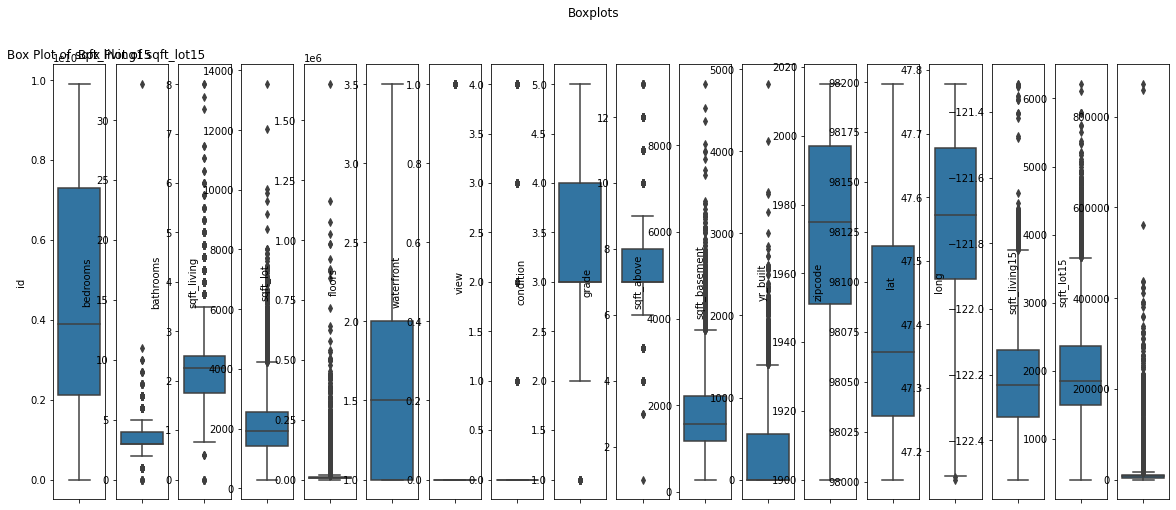

In [ ]:
# Checking for Outliers
# plotting boxplots to check outliers. 
#
fig, ax = plt.subplots(1,18, figsize=(20,8))
                                   
fig.suptitle('Boxplots')
sns.boxplot(data=Real_estate, y = "id", ax=ax[0])
ax[0].set_title('Box Plot of id')
sns.boxplot(data=Real_estate, y = "bedrooms", ax=ax[1])
ax[1].set_title('Box Plot of bedrooms')
sns.boxplot(data=Real_estate, y = "bathrooms", ax=ax[2])
ax[0].set_title('Box Plot of bathrooms')
sns.boxplot(data=Real_estate, y = "sqft_living", ax=ax[3])
ax[1].set_title('Box Plot of sqft_living')
sns.boxplot(data=Real_estate, y = "sqft_lot", ax=ax[4])
ax[1].set_title('Box Plot of sqft_lot')
sns.boxplot(data=Real_estate, y = "floors", ax=ax[5])
ax[0].set_title('Box Plot of floors')
sns.boxplot(data=Real_estate, y = "waterfront", ax=ax[6])
ax[1].set_title('Box Plot of waterfront')
sns.boxplot(data=Real_estate, y = "view", ax=ax[7])
ax[1].set_title('Box Plot of view')
sns.boxplot(data=Real_estate, y = "condition", ax=ax[8])
ax[0].set_title('Box Plot of condition')
sns.boxplot(data=Real_estate, y = "grade", ax=ax[9])
ax[1].set_title('Box Plot of grade')
sns.boxplot(data=Real_estate, y = "sqft_above", ax=ax[10])
ax[1].set_title('Box Plot of sqft_above')
sns.boxplot(data=Real_estate, y = "sqft_basement", ax=ax[11])
ax[0].set_title('Box Plot of sqft_basement')
sns.boxplot(data=Real_estate, y = "yr_built", ax=ax[12])
ax[1].set_title('Box Plot of yr_built')
sns.boxplot(data=Real_estate, y = "zipcode", ax=ax[13])
ax[1].set_title('Box Plot of zipcode')
sns.boxplot(data=Real_estate, y = "lat", ax=ax[14])
ax[0].set_title('Box Plot of lat')
sns.boxplot(data=Real_estate, y = "long", ax=ax[15])
ax[1].set_title('Box Plot of long')
sns.boxplot(data=Real_estate, y = "sqft_living15", ax=ax[16])
ax[0].set_title('Box Plot of sqft_living15')
sns.boxplot(data=Real_estate, y = "sqft_lot15", ax=ax[17])
ax[1].set_title('Box Plot of sqft_lot15')


plt.show()

Most columns have some outliers. We shall only take note of this but still keep the outliers since they could be valid observations to our analysis.

In [ ]:
# confirming there are no Missing Data
#
Real_estate.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [ ]:
# Confirming that there are no missing values

Real_estate.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 6. Exploratory Analysis

## Univariate analysis

In [ ]:
# Frequency table for waterfront existence
#
Real_estate.waterfront.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [ ]:
# Frequency table for condition
#
Real_estate.condition.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [ ]:
# Frequency table for number of bedrooms
#
print(Real_estate.bedrooms.value_counts())

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


In [ ]:
# Frequency table for grade
#
Real_estate.grade.value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

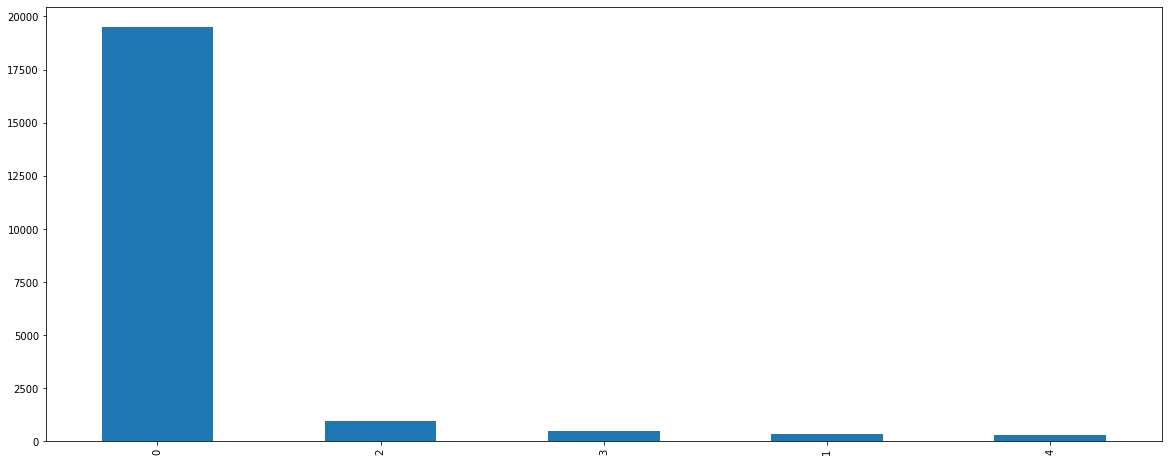

In [ ]:
# Distribution of number of views
#
Real_estate['view'].value_counts().plot.bar(figsize=(20,8))

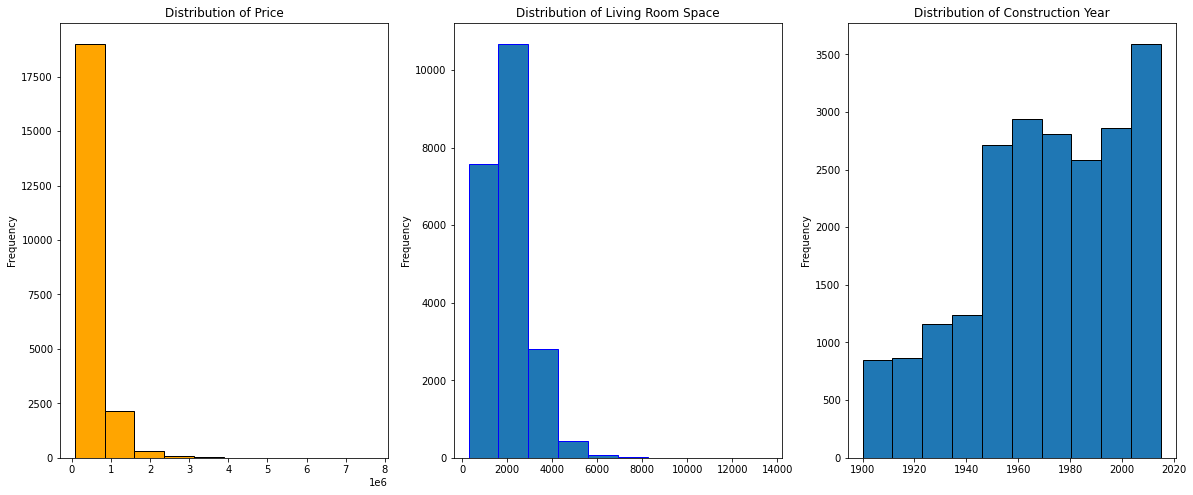

In [ ]:
# histograms to show distribution of price, living room space and year of construction
#
fig, ax=plt.subplots(1,3, figsize=(20,8))
Real_estate['price'].plot.hist(ax=ax[0], bins=10, edgecolor='black', color='orange')
ax[0].set_title('Distribution of Price')
Real_estate['sqft_living'].plot.hist(ax=ax[1], bins=10, edgecolor='blue')
ax[1].set_title('Distribution of Living Room Space')
Real_estate['yr_built'].plot.hist(ax=ax[2], bins=10, edgecolor='black')
ax[2].set_title('Distribution of Construction Year')

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

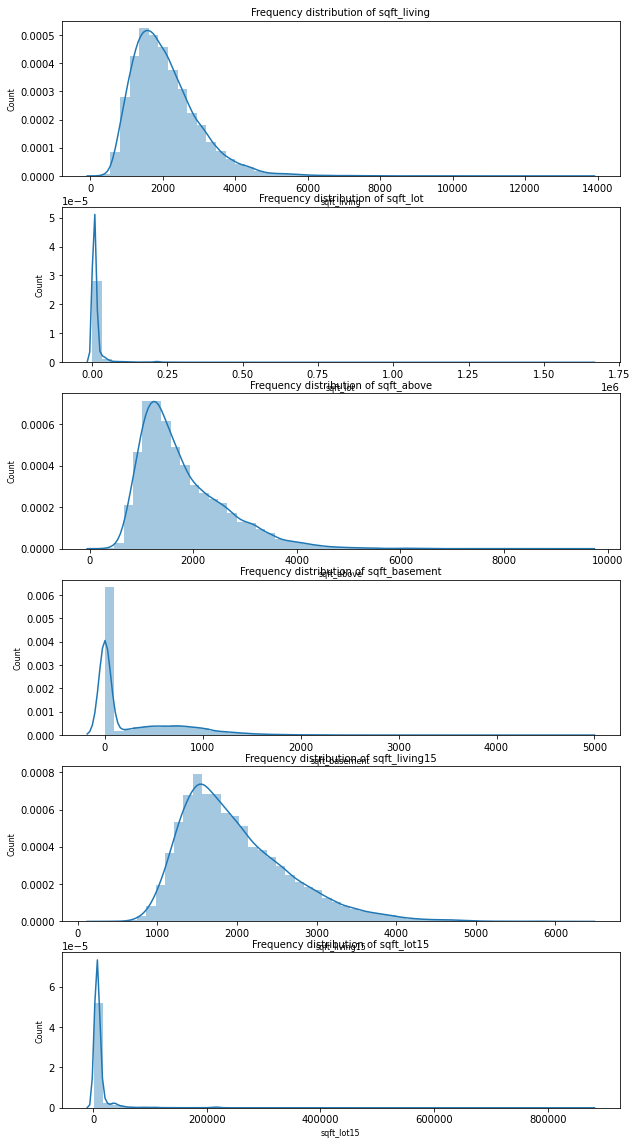

In [ ]:
# Frequency distribution plots
#
col_names = ['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
fig, ax = plt.subplots(len(col_names), figsize=(10,20))

for i, col_val in enumerate(col_names):

    sns.distplot(Real_estate[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

### Measures of central tendancy 

In [ ]:
# mean, mode and median of prices

print('Mean price is ' + str(Real_estate.price.mean()))
print('Median price is ' + str(Real_estate.price.median()))
print('Mode price is ' + str(Real_estate.price.mode()))

Mean price is 540182.1587933188
Median price is 450000.0
Mode price is 0    350000.0
1    450000.0
dtype: float64


In [ ]:
# mean, mode and median of bathrooms
#
print('Mean number of bathrooms is ' + str(Real_estate.bathrooms.mean()))
print('Median number of bathrooms is ' + str(Real_estate.bathrooms.median()))
print('Mode number of bathrooms is ' + str(Real_estate.bathrooms.mode()))

Mean number of bathrooms is 2.1147573219821405
Median number of bathrooms is 2.25
Mode number of bathrooms is 0    2.5
dtype: float64


### Measures of dispersion

In [ ]:
# summary of standard deviation, range, and interquatile range
#
Real_estate.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.161300e+04  2.161300e+04  ...   21613.000000   21613.000000
mean   4.580302e+09  5.401822e+05  ...    1986.552492   12768.455652
std    2.876566e+09  3.673622e+05  ...     685.391304   27304.179631
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.219500e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

## Bivariate analysis

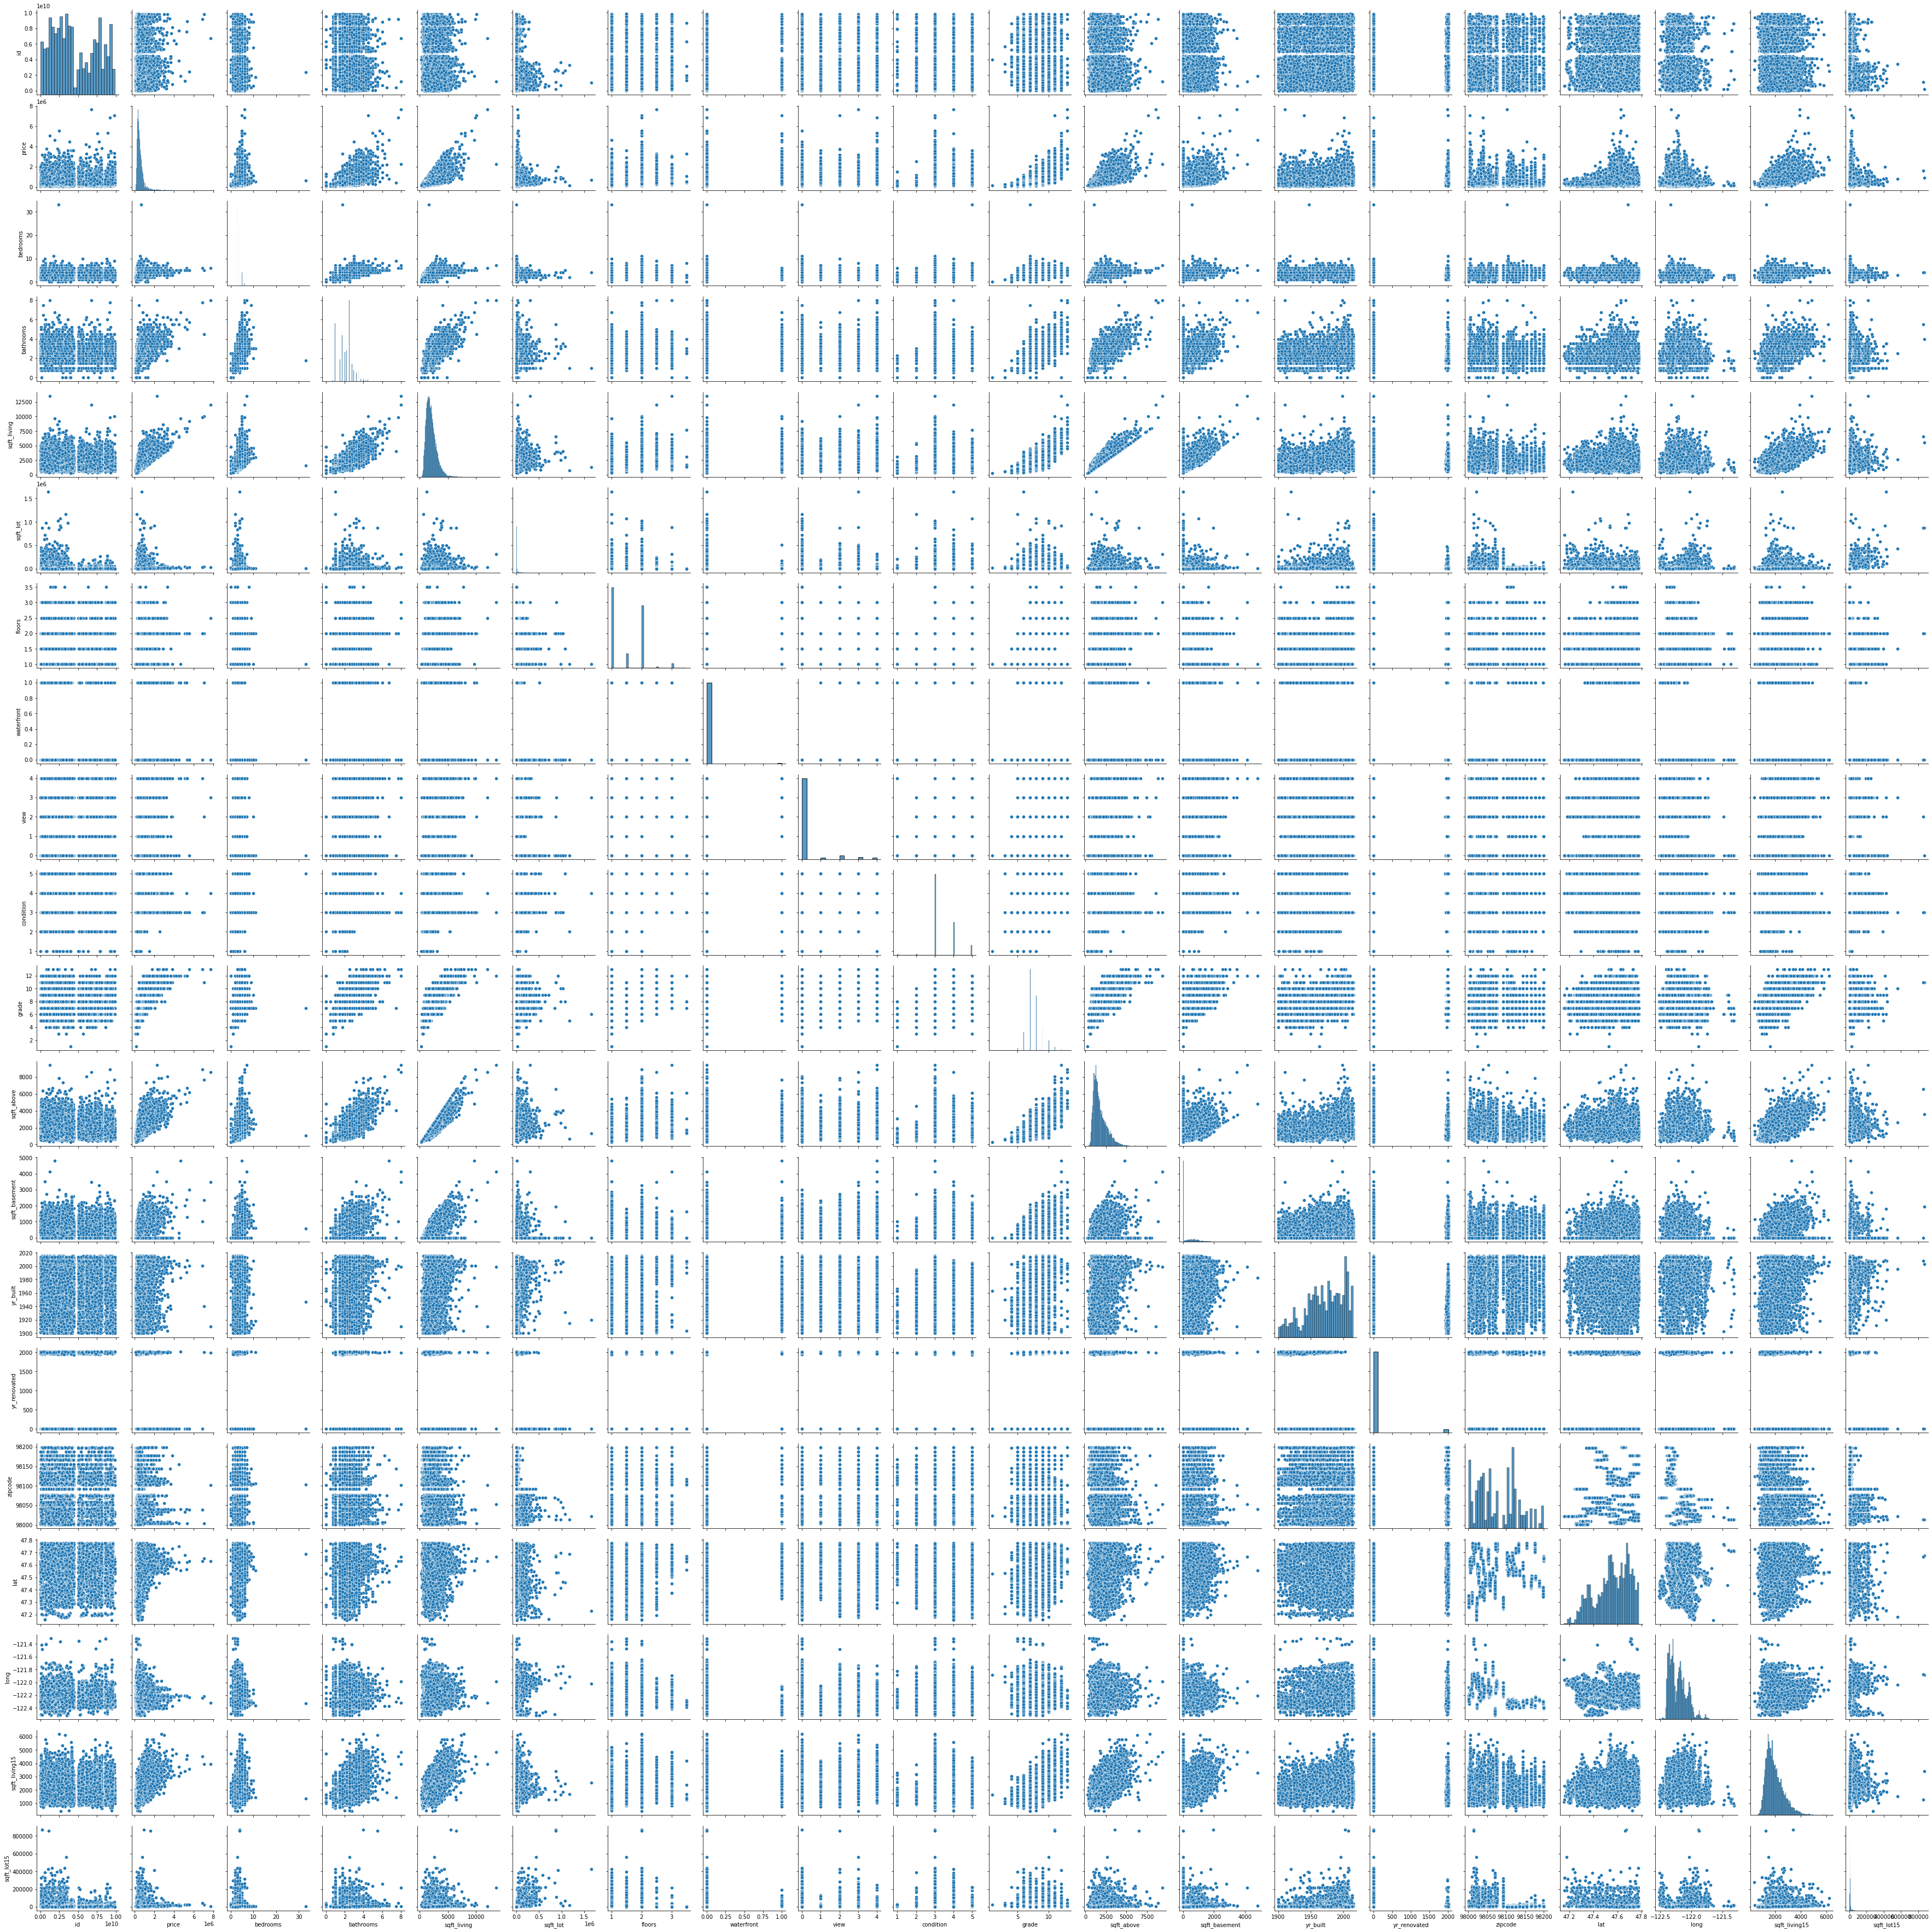

In [ ]:
# Ploting the bivariate summaries and recording observations
#
sns.pairplot(Real_estate)
plt.show()

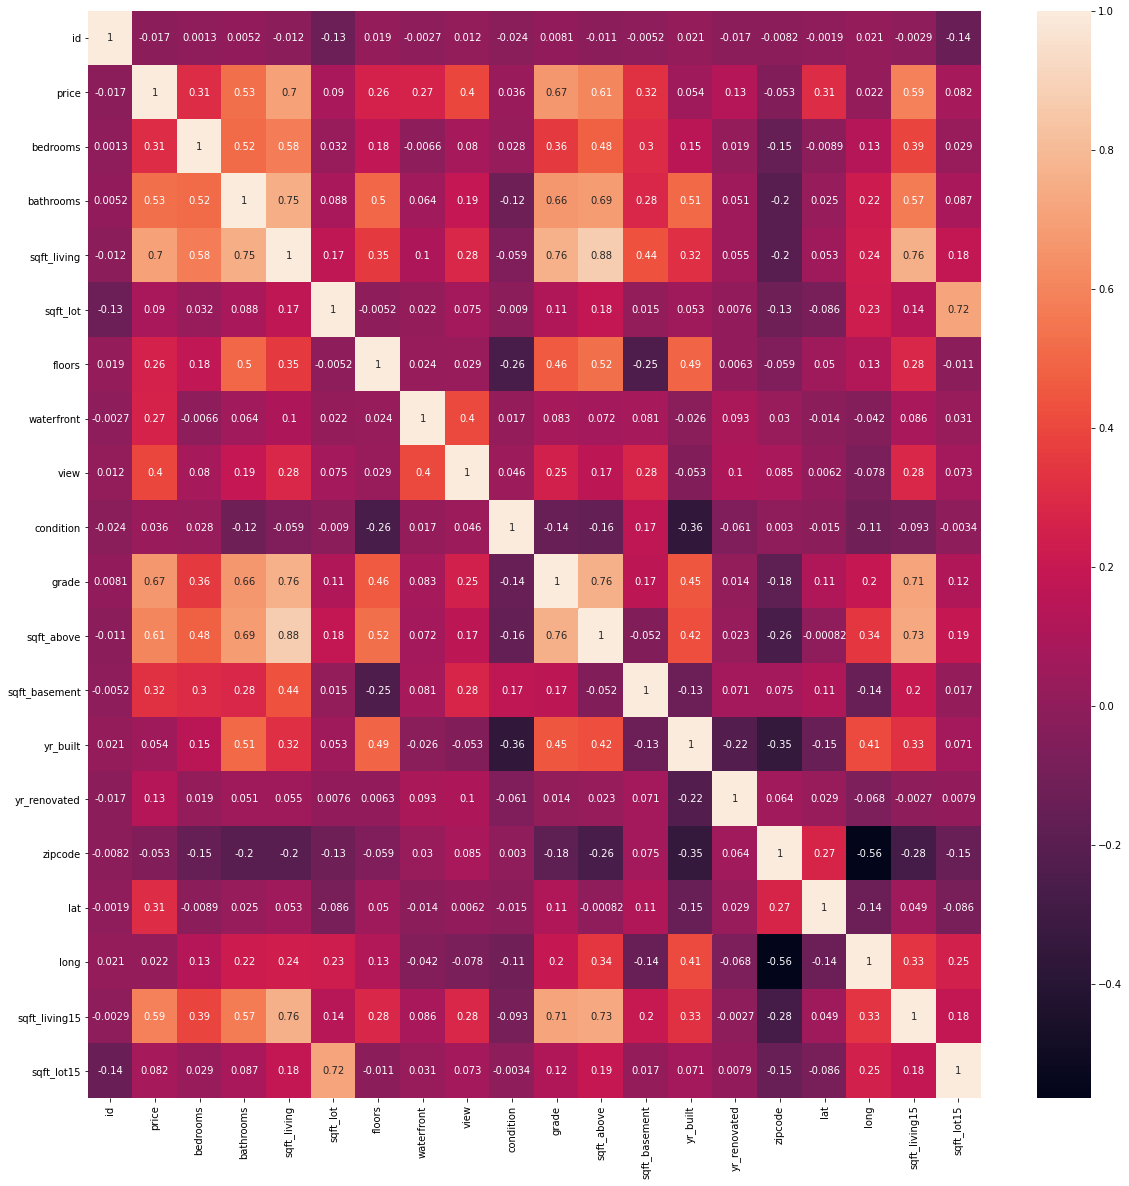

In [ ]:
# Plotting the Pearson correlation coefficient among variables
plt.figure(figsize=(20, 20))
sns.heatmap(Real_estate.corr(),annot=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


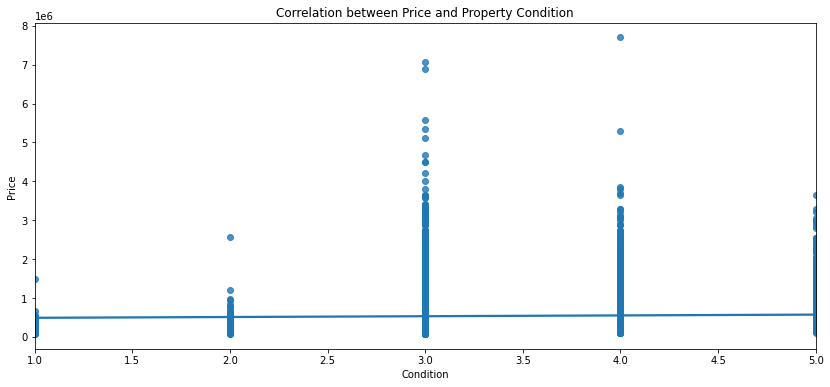

In [ ]:

# scatter plot to check correlation of house condition and price
#
plt.figure(figsize = (14,6))
sns.regplot(Real_estate['condition'],Real_estate['price'])
plt.ylabel('Price')
plt.xlabel('Condition')
plt.title('Correlation between Price and Property Condition')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


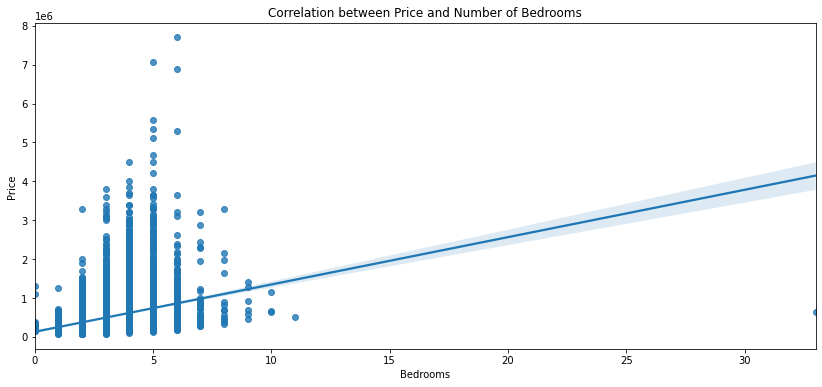

In [ ]:
# scatter plot to check correlation of number of bedrooms and price
#
plt.figure(figsize = (14,6))
sns.regplot(Real_estate['bedrooms'],Real_estate['price'])
plt.ylabel('Price')
plt.xlabel('Bedrooms')
plt.title('Correlation between Price and Number of Bedrooms')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


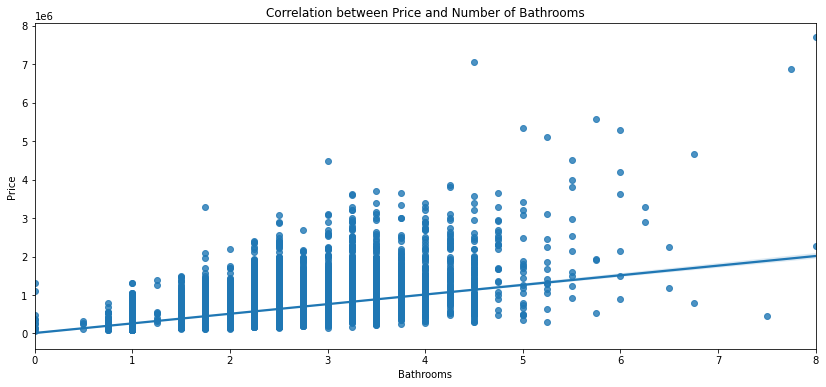

In [ ]:
# scatter plot to check correlation of number of bathrooms and price
#
plt.figure(figsize = (14,6))
sns.regplot(Real_estate['bathrooms'],Real_estate['price'])
plt.ylabel('Price')
plt.xlabel('Bathrooms')
plt.title('Correlation between Price and Number of Bathrooms')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


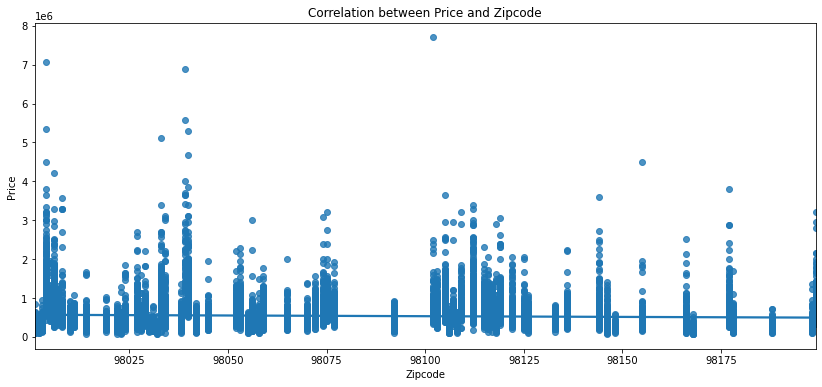

In [ ]:
# scatter plot to check correlation of zipcode and price
#
plt.figure(figsize = (14,6))
sns.regplot(Real_estate['zipcode'],Real_estate['price'])
plt.ylabel('Price')
plt.xlabel('Zipcode')
plt.title('Correlation between Price and Zipcode')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


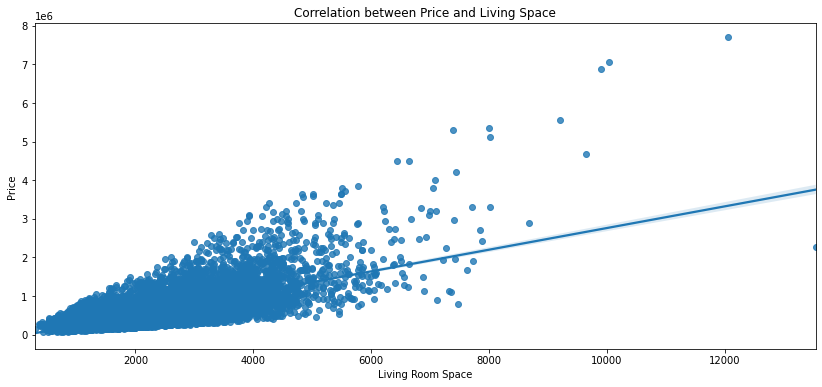

In [ ]:
# scatter plot to check correlation of living room space and price
#
plt.figure(figsize = (14,6))
sns.regplot(Real_estate['sqft_living'],Real_estate['price'])
plt.ylabel('Price')
plt.xlabel('Living Room Space')
plt.title('Correlation between Price and Living Space')
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


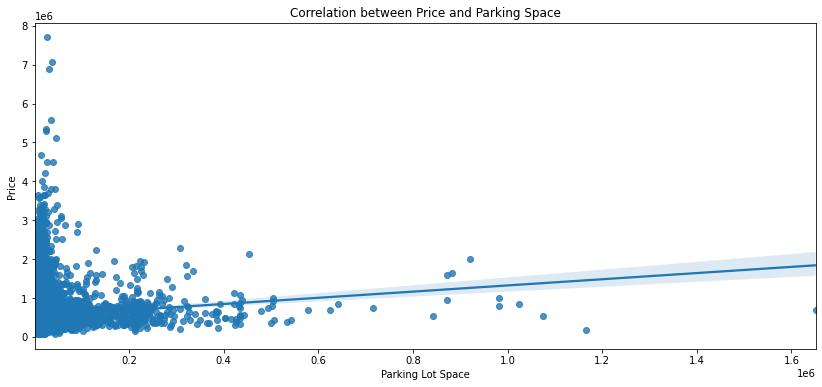

In [ ]:
# scatter plot to check correlation of parking lot space and price
#
plt.figure(figsize = (14,6))
sns.regplot(Real_estate['sqft_lot'],Real_estate['price'])
plt.ylabel('Price')
plt.xlabel('Parking Lot Space')
plt.title('Correlation between Price and Parking Space')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


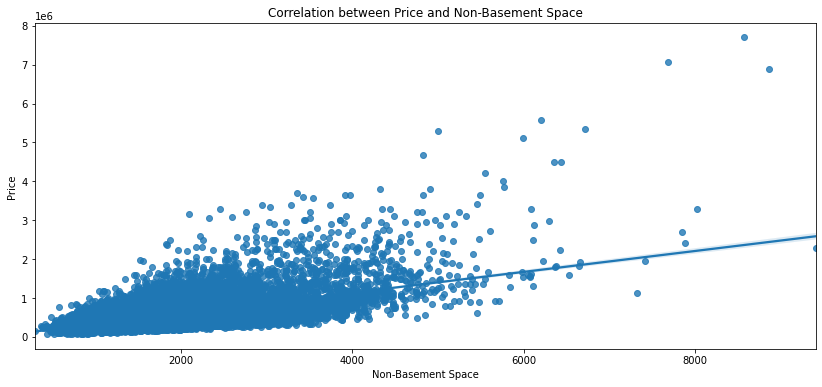

In [ ]:
# scatter plot to check correlation of non-basement space and price
#
plt.figure(figsize = (14,6))
sns.regplot(Real_estate['sqft_above'],Real_estate['price'])
plt.ylabel('Price')
plt.xlabel('Non-Basement Space')
plt.title('Correlation between Price and Non-Basement Space')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


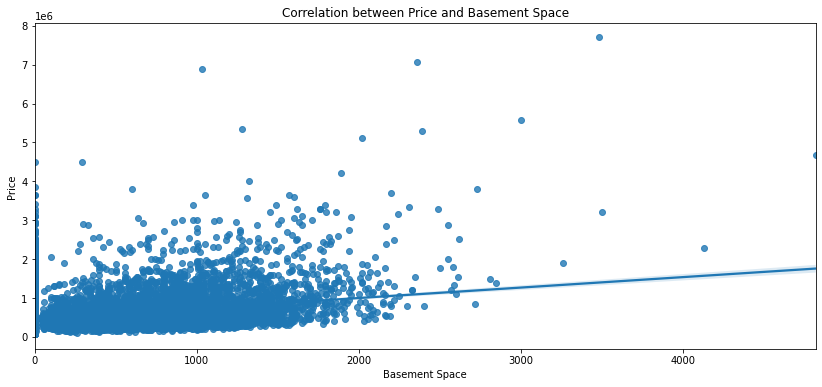

In [ ]:
# scatter plot to check correlation of basement space and price
#
plt.figure(figsize = (14,6))
sns.regplot(Real_estate['sqft_basement'],Real_estate['price'])
plt.ylabel('Price')
plt.xlabel('Basement Space')
plt.title('Correlation between Price and Basement Space')
plt.show()

## Multivariate analysis

### Principle Component Analysis (PCA)

In [ ]:
# defining the features and target variable

x = Real_estate.drop(['price','id'],1)
y = Real_estate['price']

# splitting the data into training and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# normalize feature set

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# applying PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# checking the variance explained by each principal component

explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.90184249e-01, 1.22990208e-01, 1.03712695e-01, 7.62967169e-02,
       6.70331231e-02, 5.59291385e-02, 4.81187991e-02, 4.66158192e-02,
       3.62561375e-02, 3.32295484e-02, 2.72837393e-02, 2.22399476e-02,
       1.79057040e-02, 1.50081156e-02, 1.40845003e-02, 1.25517548e-02,
       1.05598044e-02, 4.40901578e-34])

The results above show that the first three components explain 29% , 12% and 10% (respectively) of the variance in the dataset.

In [ ]:
# using PCA to train algorithm

pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# making predictions using random forest classifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results

y_pred = classifier.predict(x_test)

# evaluating the model with only one principal component
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.009715475364330326


With only one feature, the random forest algorithm is able to correctly predict with an accuracy of 0.9% which is extremely lower and quite insignificant.

Factor Analysis

In [ ]:
# evaluating the “factorability” of our dataset

!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(Real_estate)
chi_square_value, p_value

/usr/local/lib/python3.6/dist-packages/factor_analyzer/factor_analyzer.py:188: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(nan, nan)

In Bartlett ’s test, the p-value is nan. 

In [ ]:
# checking the Kaiser-Meyer-Olkin (KMO) Test
#
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(Real_estate)

kmo_model

0.7423799181281365

kmo_model is 0.7. is inadequate and cannot proceed with factor analysis.

## 7. Implementing the Solution

## Feature engineering 

In [ ]:

# dropping the id column
#
Real_estate = Real_estate.drop(columns='id')

In [ ]:
# Implementing the Solution
# 

In [ ]:
# create a new column to show the age of the house

conditions = [Real_estate['yr_renovated'] == 0,
              Real_estate['yr_renovated'] != 0]

# create a list of the values to assign each condition
age1 = 2020 - Real_estate['yr_built']
age2 = 2020 - Real_estate['yr_renovated']

values = [age1, age2]

# creating a new columnn status column using the conditions and values above

Real_estate['age'] = np.select(conditions, values)
Real_estate

price  bedrooms  bathrooms  ...  sqft_living15  sqft_lot15  age
0      221900.0         3       1.00  ...           1340        5650   65
1      538000.0         3       2.25  ...           1690        7639   29
2      180000.0         2       1.00  ...           2720        8062   87
3      604000.0         4       3.00  ...           1360        5000   55
4      510000.0         3       2.00  ...           1800        7503   33
...         ...       ...        ...  ...            ...         ...  ...
21608  360000.0         3       2.50  ...           1530        1509   11
21609  400000.0         4       2.50  ...           1830        7200    6
21610  402101.0         2       0.75  ...           1020        2007   11
21611  400000.0         3       2.50  ...           1410        1287   16
21612  325000.0         2       0.75  ...           1020        1357   12

[21613 rows x 20 columns]

In [ ]:
# dropping the construction and renovation year
#
Real_estate = Real_estate. drop(columns=['yr_built', 'yr_renovated'])

In [ ]:
# encoding the zipcode variable

# import labelencoder
from sklearn.preprocessing import LabelEncoder

# apply label encoder to appropriate column

le = LabelEncoder()
Real_estate['zipcode'] = le.fit_transform(Real_estate['zipcode'])

Real_estate.head()

price  bedrooms  bathrooms  ...  sqft_living15  sqft_lot15  age
0  221900.0         3       1.00  ...           1340        5650   65
1  538000.0         3       2.25  ...           1690        7639   29
2  180000.0         2       1.00  ...           2720        8062   87
3  604000.0         4       3.00  ...           1360        5000   55
4  510000.0         3       2.00  ...           1800        7503   33

[5 rows x 18 columns]

since the zipcode tells us the general location of a real estate property, we can drop the latitude and longitude.

In [ ]:
# dropping the latitude and longitude

Real_estate = Real_estate.drop(columns=['lat', 'long'])
Real_estate.head()

price  bedrooms  bathrooms  ...  sqft_living15  sqft_lot15  age
0  221900.0         3       1.00  ...           1340        5650   65
1  538000.0         3       2.25  ...           1690        7639   29
2  180000.0         2       1.00  ...           2720        8062   87
3  604000.0         4       3.00  ...           1360        5000   55
4  510000.0         3       2.00  ...           1800        7503   33

[5 rows x 16 columns]

In [ ]:
# dropping sqft_above and sqft_basement since they add up to sqft_living
#
Real_estate = Real_estate.drop(columns=['sqft_above', 'sqft_basement'])
Real_estate.head()

price  bedrooms  bathrooms  ...  sqft_living15  sqft_lot15  age
0  221900.0         3       1.00  ...           1340        5650   65
1  538000.0         3       2.25  ...           1690        7639   29
2  180000.0         2       1.00  ...           2720        8062   87
3  604000.0         4       3.00  ...           1360        5000   55
4  510000.0         3       2.00  ...           1800        7503   33

[5 rows x 14 columns]


### Checking for multicollinearity

In [ ]:
# Remove the dependent column so as to focus on independent variables only.

independent_only = Real_estate.drop(columns=['price'])

# Display the correlations between the independent variables

correlations = independent_only.corr()

correlations

bedrooms  bathrooms  ...  sqft_lot15       age
bedrooms       1.000000   0.515884  ...    0.029244 -0.165506
bathrooms      0.515884   1.000000  ...    0.087175 -0.537164
sqft_living    0.576671   0.754665  ...    0.183286 -0.343745
sqft_lot       0.031703   0.087740  ...    0.718557 -0.052911
floors         0.175429   0.500653  ...   -0.011269 -0.505408
waterfront    -0.006582   0.063744  ...    0.030703  0.000537
view           0.079532   0.187737  ...    0.072575  0.018264
condition      0.028472  -0.124982  ...   -0.003406  0.396358
grade          0.356967   0.664983  ...    0.119248 -0.460796
zipcode       -0.152008  -0.192873  ...   -0.144980  0.301435
sqft_living15  0.391638   0.568634  ...    0.183192 -0.324579
sqft_lot15     0.029244   0.087175  ...    1.000000 -0.070219
age           -0.165506  -0.537164  ...   -0.070219  1.000000

[13 rows x 13 columns]

In [ ]:
 # Use calculated correlations to compute the VIF score for each variable

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

bedrooms  bathrooms  ...  sqft_lot15       age
bedrooms       1.650033  -0.462744  ...    0.086976 -0.124224
bathrooms     -0.462744   3.269524  ...    0.090867  0.881533
sqft_living   -0.985156  -1.677113  ...   -0.183606 -0.436900
sqft_lot       0.049176   0.000512  ...   -1.475724 -0.044320
floors         0.057195  -0.500087  ...    0.058260  0.433019
waterfront     0.063467   0.017153  ...   -0.019052  0.018930
view           0.106495  -0.093693  ...    0.007147 -0.135983
condition     -0.053350  -0.171857  ...   -0.025725 -0.558929
grade          0.318975  -0.232234  ...    0.104315  0.437255
zipcode        0.087095  -0.024377  ...    0.066835 -0.461870
sqft_living15  0.038163   0.168010  ...   -0.170235 -0.027057
sqft_lot15     0.086976   0.090867  ...    2.118475  0.082955
age           -0.124224   0.881533  ...    0.082955  2.081054

[13 rows x 13 columns]

The VIF score is found along the diagonal from top left to bottom right. Since all the VIF scores are below 5, we can say that there is no multicollinearity thus no alarming correlation between the independent variables.

## Multiple linear Regression.

This prediction model will be the baseline model for the research question. This because we will not introduce any bias in search of variance reduction in the multiple linear regression. The model is also simple enough and applies very few assumptions. We shall then compare its prediction accuracy and performance with other regression models.

In [ ]:
# Defining the features and target variable
X = Real_estate[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 
        'zipcode', 'sqft_living15', 'sqft_lot15', 'age']]
y = Real_estate['price']

# Dividing the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Algorithm

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Checking coefficients chosen by the regression model 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
bedrooms       -37374.360341
bathrooms       40283.877717
sqft_living       176.434289
sqft_lot            0.021756
floors          19069.661345
waterfront     615440.754526
view            49492.818756
condition       20296.564413
grade          112813.853429
zipcode           433.854947
sqft_living15      18.692396
sqft_lot15         -0.621015
age              3061.241565

In [ ]:
# Making Predictions

y_pred = regressor.predict(X_test)

# Comparing actual output values for X_test with the predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual     Predicted
17384   297000.0  3.098707e+05
722    1580000.0  1.483056e+06
2680    562100.0  4.977356e+05
18754   631500.0  5.524402e+05
14554   780000.0  8.941625e+05
...          ...           ...
5427    844000.0  9.349610e+05
16547   335500.0  2.849199e+05
4585    369950.0  2.987863e+05
17762   300000.0  2.273561e+05
16323   575950.0  3.761051e+05

[4323 rows x 2 columns]

In [ ]:
# Evaluating the Model

print('Mean Price: ', Real_estate.price.mean())
print("Linear Regression R2 score is ",metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Price:  540182.1587933188
Linear Regression R2 score is  0.6302005028462412
Mean Absolute Error: 139319.3921389293
Mean Squared Error: 44037542485.772224
Root Mean Squared Error: 209851.23894266677


The RMSE score is much greater than 10% of the mean value of the prices which could imply that our algorithm is not very accurate. The R2 score of the model is 63.02% which is relatively low. However, we need to check the residuals to confirm this further.

### Residuals and Heteroskedasticity Testing

In [ ]:
# Create the residuals

residuals = np.subtract(y_pred, y_test)

# Describe the residuals

pd.DataFrame(residuals).describe()

price
count  4.323000e+03
mean   7.056690e+03
std    2.097568e+05
min   -3.165462e+06
25%   -8.220623e+04
50%    1.559298e+04
75%    1.149830e+05
max    9.278854e+05

The mean of the residuals is close to 0, indicating that the model tends to be fairly correct, although slightly under estimating prices by, on average, 7.06%

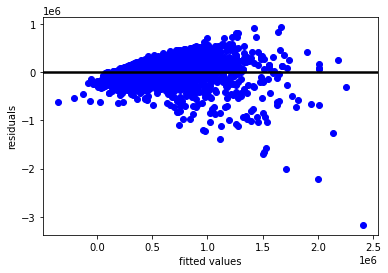

In [ ]:
# plotting the residuals

plt.scatter(y_pred, residuals, color='blue')
plt.ylabel('residuals')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black', linewidth=2.5)
plt.show()

In [ ]:
# Heteroskedasticity test using bartlett's test

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Computing a critical value of the chi squared distribution

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print('Critical Value:', critical_value)
print('Test Statistic:', test_result)

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

Critical Value: inf
Test Statistic: 418.4063111429243
The variances are homogeneous!


An infinite critical value in the context of a heteroskedasticity test means that there might be multiple cut off points and many critical values. However, this is not problematic for the analysis since the variances are homogeneous.

## Quantile Regression

Since our data has some outliers and a relatively high skewness for the dependent variable, we can use quantile regression to get a more comprehensive picture of the effect of the independent variables on the dependent variable. Here, we will model the relationship between price and the conditional quantiles of all the independent variables.

In [ ]:

# Defining the quantiles
import statsmodels.formula.api as smf

# Defining the quantiles

quantiles = [0.25,0.5,0.75]

# Finding the regression coefficients for the quantiles

for i in quantiles:
  mod = smf.quantreg('y ~ X',Real_estate)
  res = mod.fit(i)
  
  # Summary of the model
  print(res.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3159
Model:                       QuantReg   Bandwidth:                   2.134e+04
Method:                 Least Squares   Sparsity:                    3.714e+05
Date:                Sat, 21 Nov 2020   No. Observations:                21613
Time:                        17:58:28   Df Residuals:                    21599
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.753e+05    1.2e+04    -64.666      0.000   -7.99e+05   -7.52e+05
X[0]       -2.254e+04   1452.644    -15.513      0.000   -2.54e+04   -1.97e+04
X[1]        2.758e+04   2536.070     10.877      0.000    2.26e+04    3.26e+04
X[2]          75.4547      2.596     29.064      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3366
Model:                       QuantReg   Bandwidth:                   2.654e+04
Method:                 Least Squares   Sparsity:                    3.746e+05
Date:                Sat, 21 Nov 2020   No. Observations:                21613
Time:                        17:58:32   Df Residuals:                    21599
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.365e+05   1.52e+04     -9.006      0.000   -1.66e+05   -1.07e+05
X[0]       -6.135e+04   1759.705    -34.866      0.000   -6.48e+04   -5.79e+04
X[1]         1.48e+04   2991.333      4.947      0.000    8933.484    2.07e+04
X[2]         161.6206      3.092     52.278      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


The prediction in the quantile regression is relatively poor as shown in the Pseudo R-squared values which is as low as 0.32 for the 25 percentile and as high as 0.46 for the 75 percentile. The model explains less than 0.5 of the variability in the data at best. An issue of multicollinearity could be the problem in which case we need to explore other regression models that perform regularization.

In [ ]:
# Checking other quantiles

quantiles = np.arange(0.1,1,0.1)

# Finding the regression coefficients for the quantiles

for i in quantiles:
  mod = smf.quantreg('y ~ X',Real_estate)
  res = mod.fit(i)
  
  # Summary of the model
  print(res.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2591
Model:                       QuantReg   Bandwidth:                   2.350e+04
Method:                 Least Squares   Sparsity:                    4.616e+05
Date:                Sat, 21 Nov 2020   No. Observations:                21613
Time:                        18:12:51   Df Residuals:                    21599
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.911e+05   1.02e+04    -38.248      0.000   -4.11e+05   -3.71e+05
X[0]       -1.825e+04   1259.957    -14.483      0.000   -2.07e+04   -1.58e+04
X[1]        2.148e+04   2148.612      9.996      0.000    1.73e+04    2.57e+04
X[2]          65.4909      2.237     29.272      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2963
Model:                       QuantReg   Bandwidth:                   2.128e+04
Method:                 Least Squares   Sparsity:                    3.846e+05
Date:                Sat, 21 Nov 2020   No. Observations:                21613
Time:                        18:12:55   Df Residuals:                    21599
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.192e+05   1.15e+04    -53.853      0.000   -6.42e+05   -5.97e+05
X[0]       -2.509e+04   1406.570    -17.840      0.000   -2.78e+04   -2.23e+04
X[1]        3.104e+04   2446.312     12.688      0.000    2.62e+04    3.58e+04
X[2]          72.8672      2.505     29.083      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3318
Model:                       QuantReg   Bandwidth:                   2.206e+04
Method:                 Least Squares   Sparsity:                    3.528e+05
Date:                Sat, 21 Nov 2020   No. Observations:                21613
Time:                        18:12:59   Df Residuals:                    21599
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.993e+05   1.23e+04    -65.109      0.000   -8.23e+05   -7.75e+05
X[0]       -2.324e+04   1466.611    -15.846      0.000   -2.61e+04   -2.04e+04
X[1]        2.954e+04   2558.148     11.549      0.000    2.45e+04    3.46e+04
X[2]          80.6528      2.608     30.923      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3547
Model:                       QuantReg   Bandwidth:                   2.387e+04
Method:                 Least Squares   Sparsity:                    3.381e+05
Date:                Sat, 21 Nov 2020   No. Observations:                21613
Time:                        18:13:04   Df Residuals:                    21599
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.685e+05    1.3e+04    -51.586      0.000   -6.94e+05   -6.43e+05
X[0]        -2.76e+04   1514.120    -18.231      0.000   -3.06e+04   -2.46e+04
X[1]        2.861e+04   2610.681     10.960      0.000    2.35e+04    3.37e+04
X[2]         106.0194      2.685     39.488      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3366
Model:                       QuantReg   Bandwidth:                   2.654e+04
Method:                 Least Squares   Sparsity:                    3.746e+05
Date:                Sat, 21 Nov 2020   No. Observations:                21613
Time:                        18:13:08   Df Residuals:                    21599
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.365e+05   1.52e+04     -9.006      0.000   -1.66e+05   -1.07e+05
X[0]       -6.135e+04   1759.705    -34.866      0.000   -6.48e+04   -5.79e+04
X[1]         1.48e+04   2991.333      4.947      0.000    8933.484    2.07e+04
X[2]         161.6206      3.092     52.278      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4042
Model:                       QuantReg   Bandwidth:                   2.395e+04
Method:                 Least Squares   Sparsity:                    3.643e+05
Date:                Sat, 21 Nov 2020   No. Observations:                21613
Time:                        18:13:12   Df Residuals:                    21599
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.284e+05   1.49e+04    -48.743      0.000   -7.58e+05   -6.99e+05
X[0]       -2.495e+04   1739.083    -14.348      0.000   -2.84e+04   -2.15e+04
X[1]        5.417e+04   2874.238     18.845      0.000    4.85e+04    5.98e+04
X[2]         107.0255      3.022     35.420      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4318
Model:                       QuantReg   Bandwidth:                   2.306e+04
Method:                 Least Squares   Sparsity:                    4.179e+05
Date:                Sat, 21 Nov 2020   No. Observations:                21613
Time:                        18:13:16   Df Residuals:                    21599
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.675e+05   1.68e+04    -57.555      0.000      -1e+06   -9.35e+05
X[0]       -2.492e+04   1960.756    -12.710      0.000   -2.88e+04   -2.11e+04
X[1]        2.997e+04   3131.179      9.573      0.000    2.38e+04    3.61e+04
X[2]         128.1088      3.351     38.230      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4548
Model:                       QuantReg   Bandwidth:                   2.254e+04
Method:                 Least Squares   Sparsity:                    5.601e+05
Date:                Sat, 21 Nov 2020   No. Observations:                21613
Time:                        18:13:20   Df Residuals:                    21599
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.375e+05    2.1e+04    -39.924      0.000   -8.79e+05   -7.96e+05
X[0]       -3.497e+04   2498.867    -13.996      0.000   -3.99e+04   -3.01e+04
X[1]        2.516e+04   3799.827      6.620      0.000    1.77e+04    3.26e+04
X[2]         168.3630      4.180     40.282      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


The condition number is large, 6.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.

## Ridge Regression

Implementing L2 regularization method to help deal with multicollinearity in the data.

In [ ]:
# create ridge model and indicate normalization 
 
ridge = Ridge(normalize=True)

# setup the grid to use

search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# run the model and determine the model's strength  

search.fit(X_train,y_train)
print(search.best_params_)

print(abs(search.best_score_))

{'alpha': 0.001}
50312068856.09465


The bestscore tells us what the best possible mean squared error is. In this case, the value MSE is better than what the baseline model was.

In [ ]:
# fit the model with the alpha value above and find the metrics 
#
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
y_pred_ridge=ridge.predict(X_test)

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred_ridge))
print("Ridge Regression R2 score is ",metrics.r2_score(y_test, y_pred_ridge))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred_ridge))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))

Mean Absolute Error: 139288.6529619359
Ridge Regression R2 score is  0.6302170833287309
Mean Squared Error: 44035568000.388405
Root Mean Squared Error: 209846.53440166317


The R2 score of the model is still 63.02%.

In [ ]:
# Checking the coefficient values
#
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    coef_dict_baseline[feat] = coef

# comparing with the coefficients from the baseline model
print('    Linear Coefficients')
print(coeff_df)
print('>>>>>>>>>>>>>>>>>>')
print('    Ridge Coefficients')
coef_dict_baseline

    Linear Coefficients
                 Coefficient
bedrooms       -37374.360341
bathrooms       40283.877717
sqft_living       176.434289
sqft_lot            0.021756
floors          19069.661345
waterfront     615440.754526
view            49492.818756
condition       20296.564413
grade          112813.853429
zipcode           433.854947
sqft_living15      18.692396
sqft_lot15         -0.621015
age              3061.241565
>>>>>>>>>>>>>>>>>>
    Ridge Coefficients


{'age': 3054.613121746099,
 'bathrooms': 40436.237671859366,
 'bedrooms': -37169.078474619644,
 'condition': 20364.255970127713,
 'floors': 19067.51808444251,
 'grade': 112652.61555102083,
 'sqft_living': 175.86225529491716,
 'sqft_living15': 19.153470978827208,
 'sqft_lot': 0.021910077911931454,
 'sqft_lot15': -0.6191785736914829,
 'view': 49550.13917825632,
 'waterfront': 615037.3112746158,
 'zipcode': 436.7540916625632}

The coefficient values have not changed much meaning that the penalization made little difference with this dataset. 

## Lasso Regression

Implementing L1 regularization method to help deal with multicollinearity in the data.

In [ ]:
# Testing the lasso model on the whole dataset

from sklearn.metrics import mean_squared_error

# Creating lasso object

lasso = linear_model.Lasso() 

# Fitting the models

lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_)

lasso score: 0.6390130782460597
lasso MSE: 48714739320.14501
lasso coef: [-3.88516341e+04  4.21809198e+04  1.72522043e+02 -6.22904985e-03
  1.70654513e+04  5.94530299e+05  4.95710246e+04  1.99241855e+04
  1.15246218e+05  3.29597584e+02  1.63796127e+01 -5.70407931e-01
  3.08751792e+03]


In [ ]:
# Splitting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Choosing the regularization parameter  

parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients

gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("Lasso Regression R2 score is ",metrics.r2_score(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso MSE: 49477041597.88732
Lasso Regression R2 score is  0.651488825076672
linear MSE: 49471979902.23671
lasso best estimator coef: [-4.01454110e+04  3.67540501e+04  1.72166826e+02  3.06294548e-03
  2.06872047e+04  5.62162187e+05  4.83115944e+04  2.27833646e+04
  1.15812577e+05  3.02873137e+02  1.86349839e+01 -5.59037606e-01
  3.06962851e+03]
linear coef: [-4.01794676e+04  3.68612052e+04  1.72086241e+02  3.20179893e-03
  2.07715990e+04  5.65644575e+05  4.81851868e+04  2.28495379e+04
  1.15838780e+05  3.02424395e+02  1.86348405e+01 -5.59097492e-01
  3.07096287e+03]


The penalization effect on the coefficients is slightly improve when using L1 regularization. The R2 score of 65.15% is also a slight improvement compared to the baseline model.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 393042566993585.9, tolerance: 214945417316.1848
  positive)


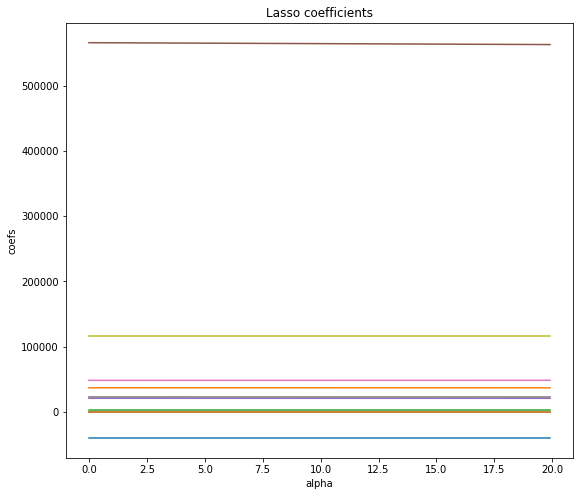

In [ ]:
# Visualizing results
#
coefsLasso = [] 

alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots

plt.figure(figsize = (20,8))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

Lasso regression influences less on the large coefficients, but reduces the small ones to zeroes. This allows us to determine which features are important to us and keeps the features that may influence the target variable.







## Elastic Net Regression¶

Combining L1 and L2 regularization methods.

In [ ]:
# We shall you use the features and target variable defined previously

from sklearn.linear_model import ElasticNet

# Defining data normalization using the ElasticNet function

elastic=ElasticNet(normalize=True)

# Creating the grid

search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [ ]:
# Fit the model and display the best parameters and associated results

search.fit(X,y)
print(search.best_params_)
print(abs(search.best_score_))

{'alpha': 1e-05, 'l1_ratio': 0.8}
49278133318.325775


In [ ]:
#  setting the hyperparameters to the recommended values 

elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X_train,y_train)
y_pred=elastic.predict(X_test)

#elastic_meanAbsError=mean_absolute_error(y_test,y_pred)
#elastic_meanSqrdError=round(mean_squared_error(np.array(y_test),y_pred),2)
#elastic_rootMeanSqrdError=round(np.sqrt(meanSqrdError),2)

print("Elastic Net R2 score is ", metrics.r2_score(y_test, y_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Elastic Net R2 score is  0.65040132174536
Mean Absolute Error: 141025.7766825207
Mean Squared Error: 49631431044.86274
Root Mean Squared Error: 222781.12811650528


In [ ]:
# Below are the coefficients

coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'age': 2864.580996070656,
 'bathrooms': 40386.26022447344,
 'bedrooms': -33854.82285730355,
 'condition': 24561.417194226633,
 'floors': 20831.957253739074,
 'grade': 110514.63114817497,
 'sqft_living': 156.84436620845585,
 'sqft_living15': 31.122000301881872,
 'sqft_lot': 0.010544442521367227,
 'sqft_lot15': -0.5085659056165914,
 'view': 49630.02489048956,
 'waterfront': 553514.8336396454,
 'zipcode': 388.7559059674163}

Compared to lasso, a hybrid og L1 and L2 regularization does not improve the model performance any further as shown by the R2 score of 65.04%.

## 8. Challenging the solution

Below is the summary of the R2 scores for the models investigated in this analysis:

1. Multiple Linear Regression - 63.02%

2. Quantile Regression - 50.44% (for the highest performing quantile)

3. Ridge Regression - 63.02%

4. Lasso Regression - 63.90%

5. Elastic Net Regression - 65.04%

From these results, we see that lasso and elastic net regressions are better performing compared to the baseline model. Quantile regression perfroms poorer relative to the baseline linear regression model. For this analysis, lasso regression should be adopted as the best solution since it performs best while still keeping the bias or penalization at a minimal.








In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

### a). Did we have the right data?


Yes, the dataset available for this analysis was relevant to the research problem. However, a description of some variables was not provided which made it difficult to decide whether or not to keep those variables in the analysis.

### b). Do we need other data to answer our question?

No, the dataset provided had relevant information for the research question. The number of records and columns available were also sufficient.

### c). Did we have the right question?

Yes, the research question was simple and specific enough.